### EDA

In [11]:
import pandas as pd

In [12]:
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

##### Descriptive Statistics: Get the summary statistics (mean, std, min, max, etc.) for numerical columns to understand the central tendency and spread.

In [13]:
final_combined_data_cleaned.describe()

,year,pH,EC,Phosphorus,Potassium,OM,Urea1,Urea2,Urea3,Urea4,...,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration_sum,Yield,Sown
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.0
mean,2018.999810,5.635805,0.098332,15.964957,105.829481,3.396024,7.058617,12.663448,10.411375,5.906555,...,34197.199533,1116.408963,1561.725331,16.426490,37.498784,182.211909,3412.442462,729.410632,3651.885028,1.0
std,2.581915,1.056754,0.107890,17.189961,75.371909,3.186679,4.355157,7.162423,5.978502,3.189126,...,1952.344023,484.582833,680.266910,4.324140,6.793477,53.259205,216.003701,96.498502,735.749061,0.0
min,2015.000000,3.000000,0.001000,0.000000,0.100000,0.010000,0.048000,0.084000,0.070000,0.048000,...,26952.864153,141.900000,286.000000,7.441530,23.879670,58.666667,2795.310000,505.690000,1757.875000,1.0
25%,2017.000000,4.800000,0.040000,6.300000,53.000000,1.600000,4.280000,7.176000,5.950000,3.944000,...,32975.177104,797.300000,1095.000000,13.599454,32.596154,126.851648,3264.830000,672.770000,3093.796969,1.0
50%,2019.000000,5.400000,0.070000,11.300000,84.500000,2.500000,6.475000,12.804000,10.406000,5.656000,...,34095.727650,1074.000000,1407.000000,15.763934,36.817582,200.202186,3394.850000,707.207500,3565.853881,1.0
75%,2021.000000,6.500000,0.120000,18.200000,137.000000,4.000000,9.260000,18.216000,14.720000,8.208000,...,35572.449945,1422.650000,1906.500000,18.538798,42.091257,219.065574,3546.130000,754.960000,4156.499935,1.0
max,2023.000000,9.900000,1.635000,151.950000,534.000000,29.050000,20.000000,30.000000,26.000000,14.000000,...,39027.778251,3336.500000,3446.000000,29.768852,59.251913,280.879781,4024.710000,1085.700000,6073.440987,1.0


##### Checking for Missing Values: Ensure there are no missing values in the dataset.

In [14]:
final_combined_data_cleaned.isnull().sum()

year                              0
District                          0
season                            0
Condition                         0
pH                                0
EC                                0
Phosphorus                        0
Potassium                         0
OM                                0
Urea1                             0
Urea2                             0
Urea3                             0
Urea4                             0
TSP0                              0
MOP1                              0
MOP2                              0
MOP3                              0
temperature_2m_max                0
temperature_2m_min                0
temperature_2m_mean               0
daylight_duration                 0
sunshine_duration                 0
rain_sum                          0
precipitation_hours               0
wind_speed_10m_max                0
wind_gusts_10m_max                0
wind_direction_10m_dominant       0
shortwave_radiation_sum     

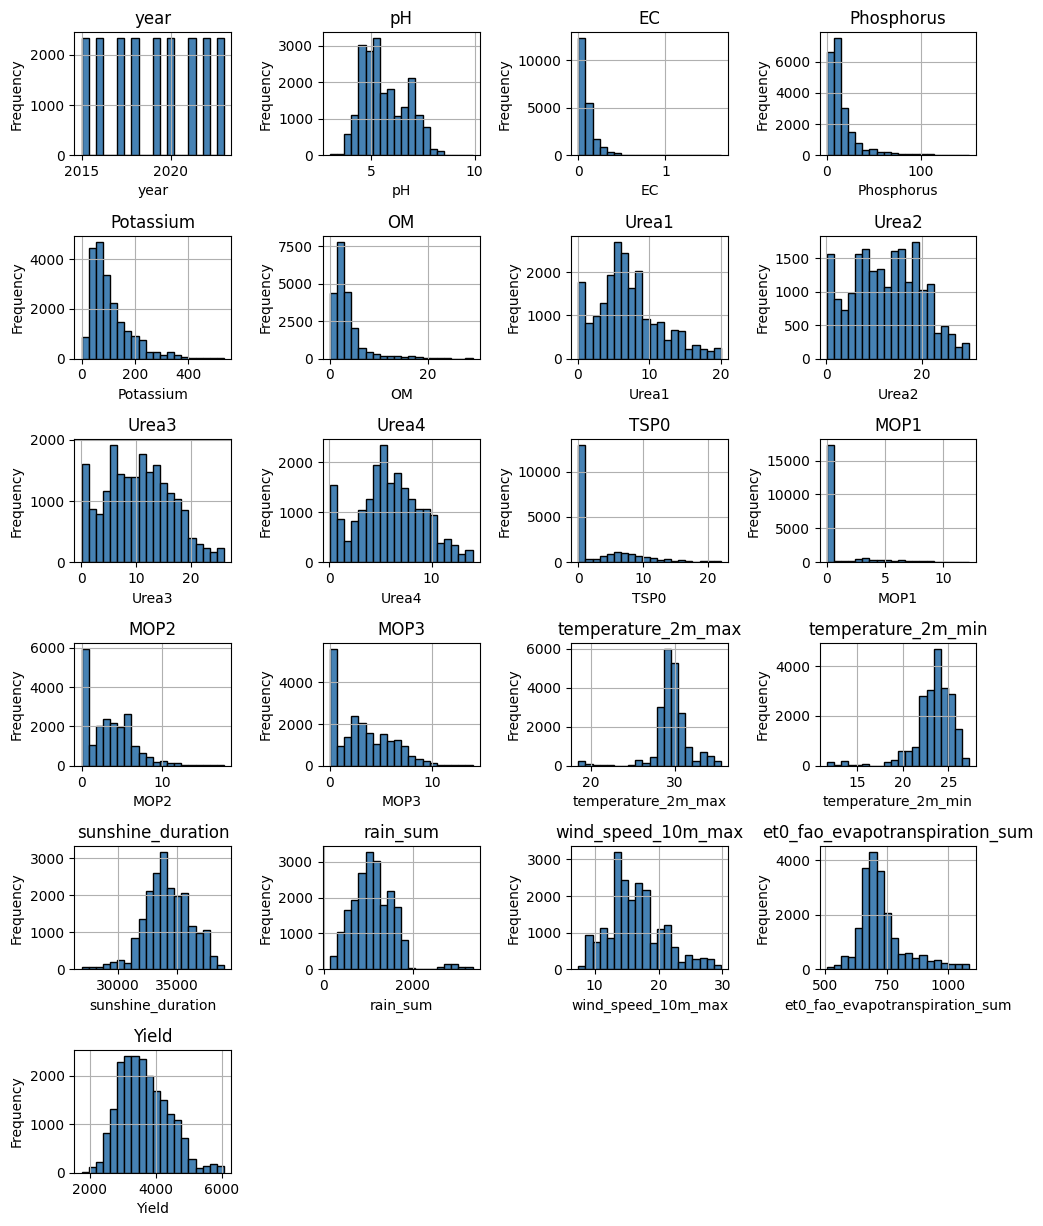

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def showdist():
    numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])
    plt.figure(figsize=(10, 16))
    for i, col in enumerate(numerical_columns):
        plt.subplot(8, 4, i + 1)  # Fixed grid of 3x3
        final_combined_data_cleaned[col].hist(bins=20, color='steelblue', edgecolor='black')
        plt.title(f'{col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


final_combined_data_cleaned = final_combined_data_cleaned.drop(['wind_direction_10m_dominant','wind_gusts_10m_max','precipitation_hours','daylight_duration','shortwave_radiation_sum', 'temperature_2m_mean', 'Sown'], axis=1)

showdist()

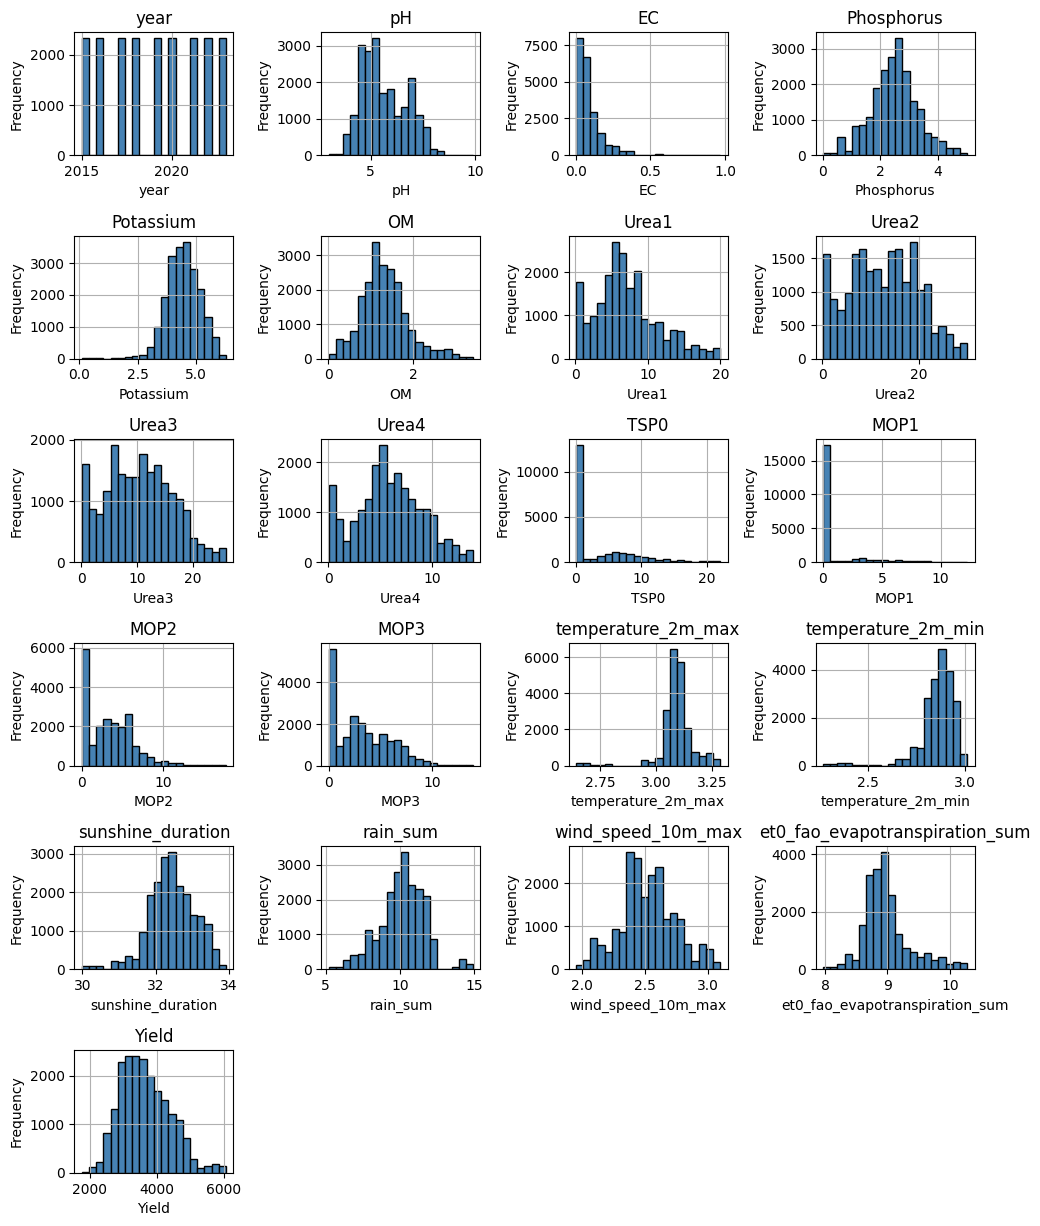

In [16]:
import numpy as np 

final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

showdist()


In [17]:
# numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])

# plt.figure(figsize=(10, 16))
# for i, col in enumerate(numerical_columns):
#     plt.subplot(8, 4, i + 1)  
#     sns.boxplot(y=final_combined_data_cleaned[col], color='lightblue')
#     plt.title(f'{col} Boxplot')
# plt.tight_layout()
# plt.show()

##### Distribution of Target Variable (Yield): Plot the distribution of the target variable (Yield) to understand its skewness or potential outliers

### Corela

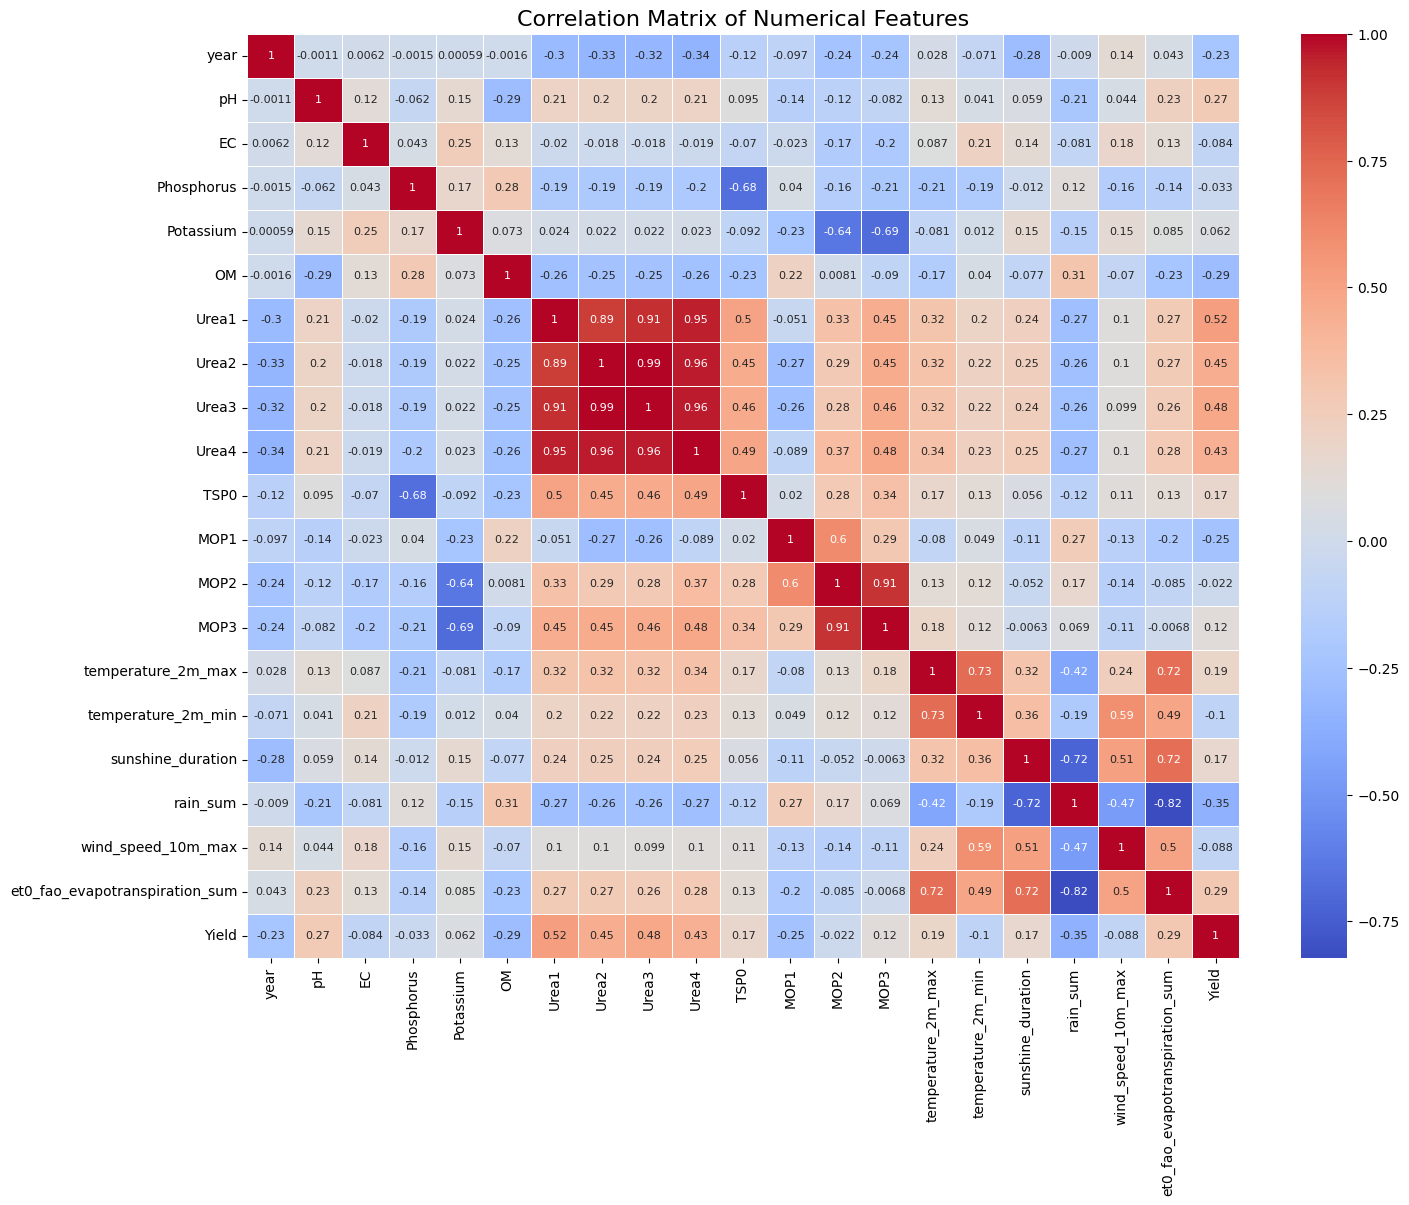

In [18]:
import numpy as np

# Selecting only the numeric columns
numeric_data = final_combined_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Re-generate the heatmap with improved clarity
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [19]:
# final_combined_data_cleaned.groupby(['year', 'season'])['Yield'].mean().plot(kind='line', title='Average Yield Over Seasons')

### Experimenting with multiple hidden layers and perceptrons

Training model with layers configuration: [4]


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0017 - mean_absolute_error: 0.7728 - val_loss: 0.5665 - val_mean_absolute_error: 0.5650 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6114 - mean_absolute_error: 0.6019 - val_loss: 0.4573 - val_mean_absolute_error: 0.5015 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5317 - mean_absolute_error: 0.5575 - val_loss: 0.4143 - val_mean_absolute_error: 0.4766 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5005 - mean_absolute_error: 0.5411 - val_loss: 0.3854 - val_mean_absolute_error: 0.4568 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4716 - mean_absolute_error: 0.5247 - val_loss: 0.3639 - val_mean_absolute_error: 0.4451 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4687 - mean_absolute_error: 0.5213 - val_loss: 0.3636 - val_me

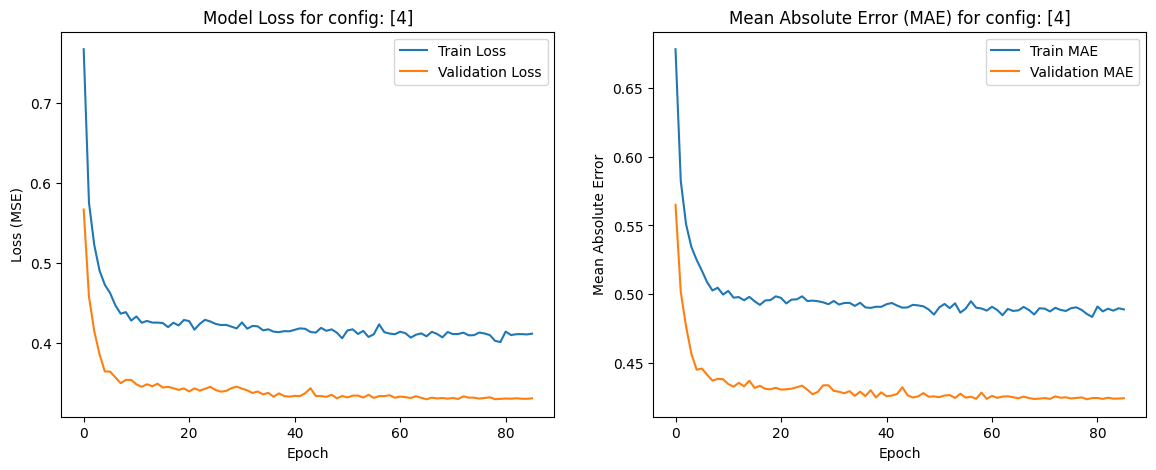

Training model with layers configuration: [16]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7434 - mean_absolute_error: 0.6473 - val_loss: 0.3662 - val_mean_absolute_error: 0.4521 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4160 - mean_absolute_error: 0.4895 - val_loss: 0.3452 - val_mean_absolute_error: 0.4405 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4034 - mean_absolute_error: 0.4843 - val_loss: 0.3283 - val_mean_absolute_error: 0.4306 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3830 - mean_absolute_error: 0.4741 - val_loss: 0.3151 - val_mean_absolute_error: 0.4235 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3747 - mean_absolute_error: 0.4684 - val_loss: 0.3116 - val_mean_absolute_error: 0.4191 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3782 - mean_abs

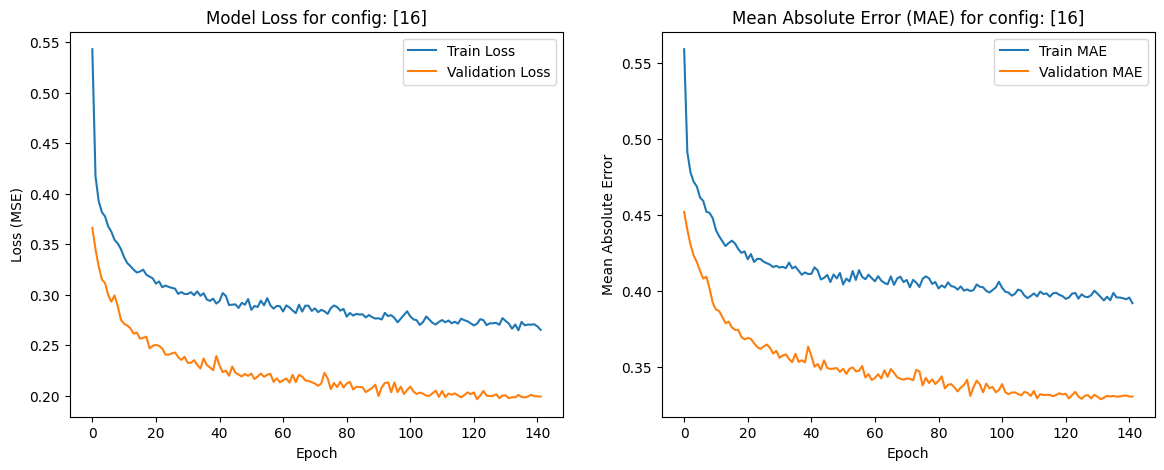

Training model with layers configuration: [64]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7201 - mean_absolute_error: 0.6430 - val_loss: 0.3295 - val_mean_absolute_error: 0.4309 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3685 - mean_absolute_error: 0.4645 - val_loss: 0.2789 - val_mean_absolute_error: 0.3968 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3401 - mean_absolute_error: 0.4465 - val_loss: 0.2737 - val_mean_absolute_error: 0.3945 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3163 - mean_absolute_error: 0.4319 - val_loss: 0.2519 - val_mean_absolute_error: 0.3752 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3121 - mean_absolute_error: 0.4279 - val_loss: 0.2448 - val_mean_absolute_error: 0.3715 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2999 - mean_abs

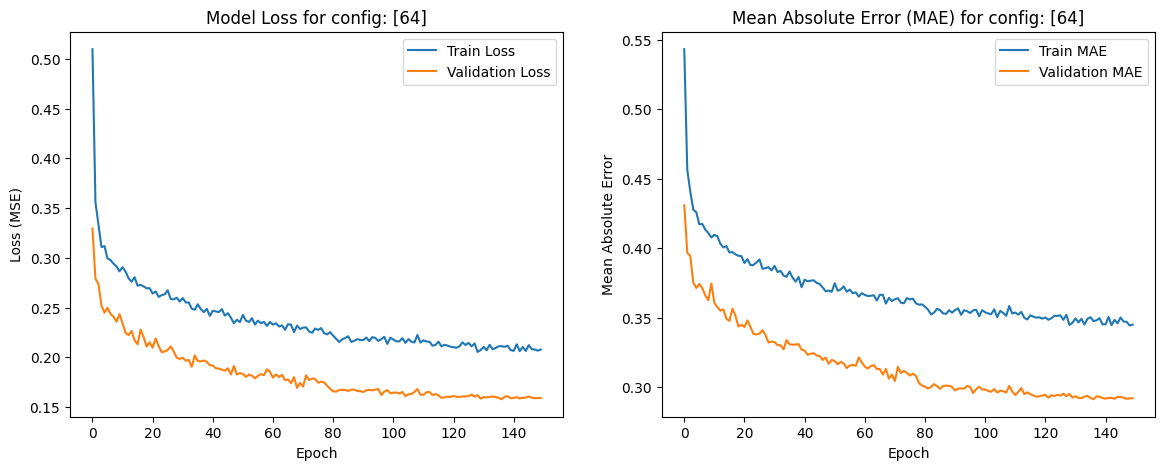

Training model with layers configuration: [256]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7411 - mean_absolute_error: 0.6246 - val_loss: 0.2665 - val_mean_absolute_error: 0.3951 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3266 - mean_absolute_error: 0.4429 - val_loss: 0.2403 - val_mean_absolute_error: 0.3743 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3089 - mean_absolute_error: 0.4258 - val_loss: 0.2424 - val_mean_absolute_error: 0.3728 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2916 - mean_absolute_error: 0.4130 - val_loss: 0.2608 - val_mean_absolute_error: 0.3881 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2875 - mean_absolute_error: 0.4106 - val_loss: 0.2356 - val_mean_absolute_error: 0.3647 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2759 - mean_ab

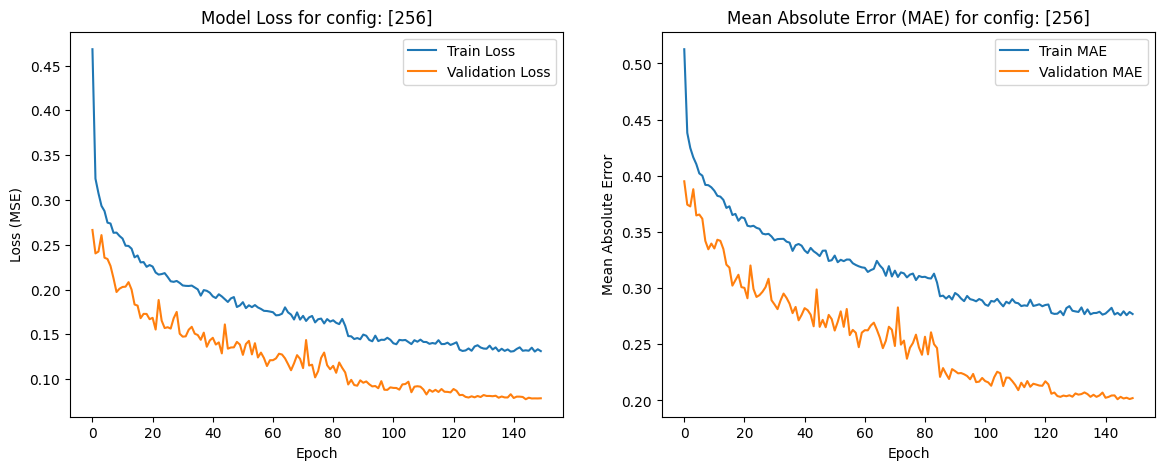

Training model with layers configuration: [16, 16]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0346 - mean_absolute_error: 0.7541 - val_loss: 0.3903 - val_mean_absolute_error: 0.4680 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4852 - mean_absolute_error: 0.5291 - val_loss: 0.3496 - val_mean_absolute_error: 0.4385 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4455 - mean_absolute_error: 0.5085 - val_loss: 0.3402 - val_mean_absolute_error: 0.4299 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4224 - mean_absolute_error: 0.4976 - val_loss: 0.3156 - val_mean_absolute_error: 0.4132 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4210 - mean_absolute_error: 0.4914 - val_loss: 0.3091 - val_mean_absolute_error: 0.4074 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3977 - mean

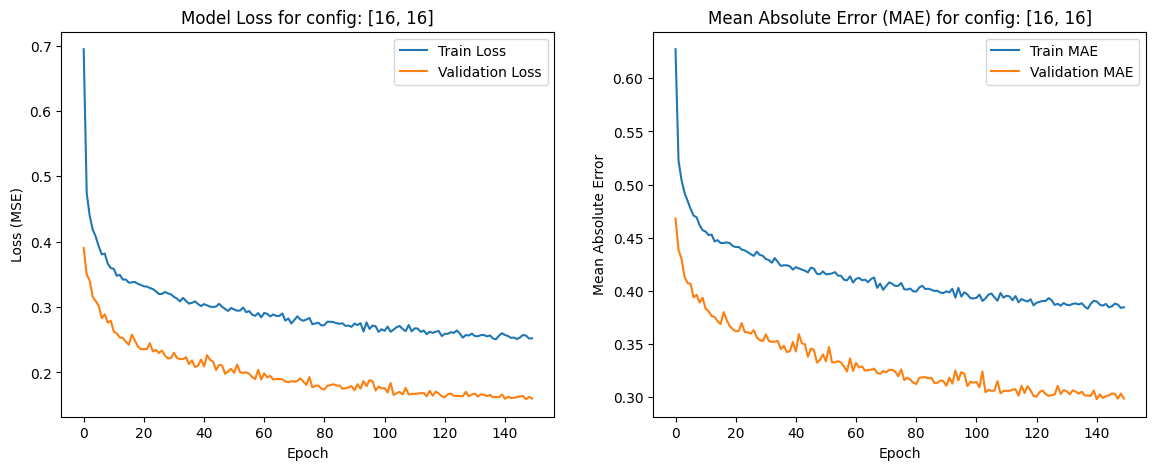

Training model with layers configuration: [64, 64]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7225 - mean_absolute_error: 0.6376 - val_loss: 0.2938 - val_mean_absolute_error: 0.4020 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3747 - mean_absolute_error: 0.4654 - val_loss: 0.2552 - val_mean_absolute_error: 0.3844 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3400 - mean_absolute_error: 0.4462 - val_loss: 0.2438 - val_mean_absolute_error: 0.3710 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3157 - mean_absolute_error: 0.4303 - val_loss: 0.2262 - val_mean_absolute_error: 0.3581 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3129 - mean_absolute_error: 0.4280 - val_loss: 0.2193 - val_mean_absolute_error: 0.3565 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3048 - mean

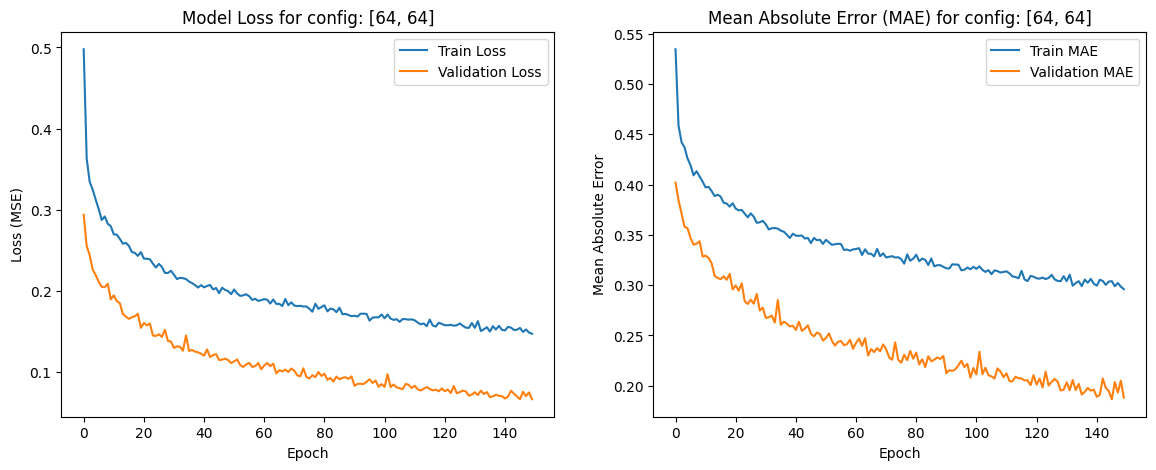

Training model with layers configuration: [64, 64, 64]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8903 - mean_absolute_error: 0.7054 - val_loss: 0.3176 - val_mean_absolute_error: 0.4245 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4262 - mean_absolute_error: 0.4997 - val_loss: 0.2704 - val_mean_absolute_error: 0.3903 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3800 - mean_absolute_error: 0.4730 - val_loss: 0.2518 - val_mean_absolute_error: 0.3779 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3550 - mean_absolute_error: 0.4563 - val_loss: 0.2493 - val_mean_absolute_error: 0.3755 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3430 - mean_absolute_error: 0.4476 - val_loss: 0.2211 - val_mean_absolute_error: 0.3544 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3275 - 

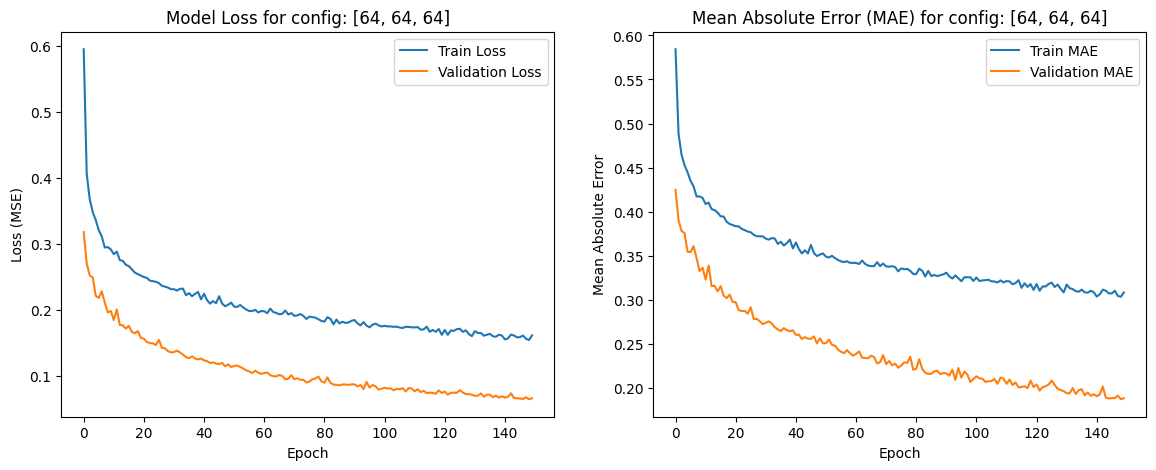

Training model with layers configuration: [64, 64, 64, 64]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9054 - mean_absolute_error: 0.7238 - val_loss: 0.3339 - val_mean_absolute_error: 0.4322 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4340 - mean_absolute_error: 0.5039 - val_loss: 0.2734 - val_mean_absolute_error: 0.3941 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3810 - mean_absolute_error: 0.4737 - val_loss: 0.2656 - val_mean_absolute_error: 0.3883 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3653 - mean_absolute_error: 0.4595 - val_loss: 0.2431 - val_mean_absolute_error: 0.3673 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3450 - mean_absolute_error: 0.4463 - val_loss: 0.2410 - val_mean_absolute_error: 0.3712 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.331

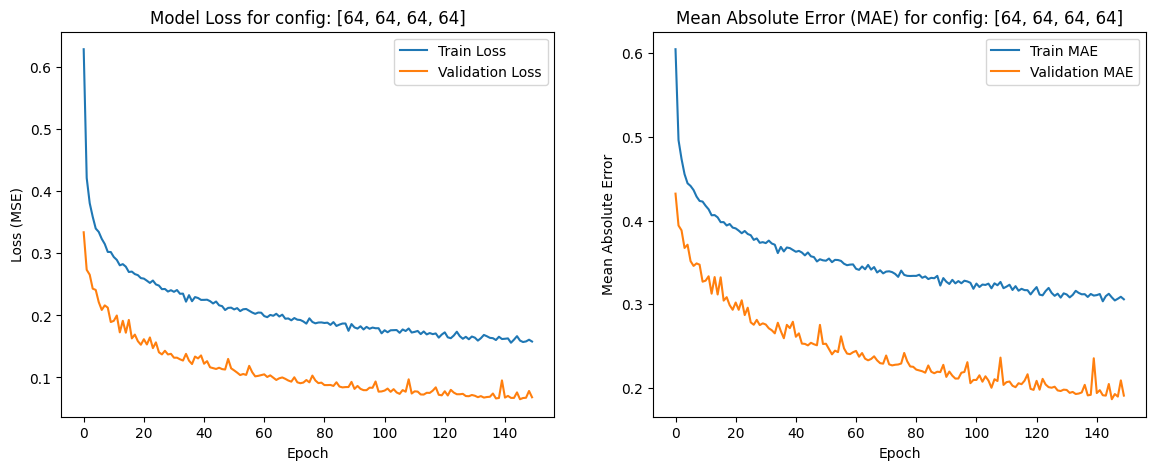

In [20]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']

# Add the one-hot encoded columns for 'District' and 'Condition'
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Function to build a model with a specified number of layers and neurons per layer
def build_model(layers_config, input_dim):
    model = Sequential()
    for i, neurons in enumerate(layers_config):
        if i == 0:
            model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
        else:
            model.add(Dense(neurons, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    model.add(Dense(1))  
    return model

# Experiment with different configurations of layers and neurons
configs = [
    [4],             
    [16],            
    [64],            
    [256],           
    [16, 16], 
    [64, 64],            
    [64, 64, 64],   
    [64, 64, 64, 64]  

]

# Function to compile and train a model and return its history
def train_model(layers_config):
    model = build_model(layers_config, X_train.shape[1])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1,
                        callbacks=[early_stopping, reduce_lr])
    return history

# Plot results for each configuration
def plot_results(history, config):
    plt.figure(figsize=(14, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for config: {config}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend(loc='upper right')

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Train MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title(f'Mean Absolute Error (MAE) for config: {config}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.show()

# Loop over configurations and train models
for config in configs:
    print(f"Training model with layers configuration: {config}")
    history = train_model(config)
    plot_results(history, config)

### Increase decrease

Training model with layers configuration: [16, 8]
Epoch 1/150


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9255 - mean_absolute_error: 0.7211 - val_loss: 0.4090 - val_mean_absolute_error: 0.4754 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5021 - mean_absolute_error: 0.5450 - val_loss: 0.3650 - val_mean_absolute_error: 0.4506 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4641 - mean_absolute_error: 0.5191 - val_loss: 0.3473 - val_mean_absolute_error: 0.4403 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4464 - mean_absolute_error: 0.5082 - val_loss: 0.3233 - val_mean_absolute_error: 0.4290 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4092 - mean_absolute_error: 0.4936 - val_loss: 0.3107 - val_mean_absolute_error: 0.4186 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4174 - mean_absolute_error: 0.4955 - val_loss: 0.3027 - val_mean_absolute_

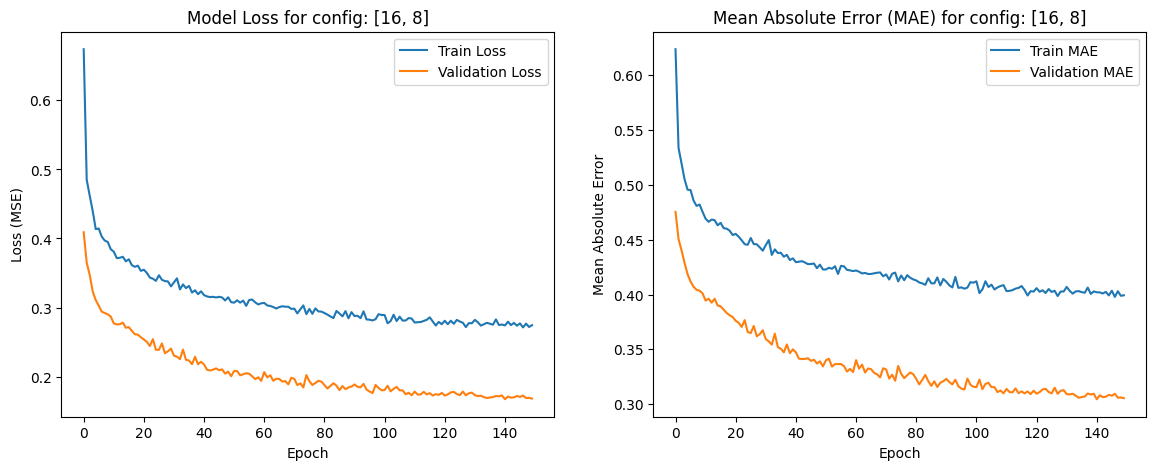

Training model with layers configuration: [8, 16]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1216 - mean_absolute_error: 0.7872 - val_loss: 0.4541 - val_mean_absolute_error: 0.5044 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5347 - mean_absolute_error: 0.5593 - val_loss: 0.3959 - val_mean_absolute_error: 0.4666 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4892 - mean_absolute_error: 0.5324 - val_loss: 0.3711 - val_mean_absolute_error: 0.4500 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4494 - mean_absolute_error: 0.5132 - val_loss: 0.3434 - val_mean_absolute_error: 0.4316 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4328 - mean_absolute_error: 0.5024 - val_loss: 0.3220 - val_mean_absolute_error: 0.4223 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4207 - mean_

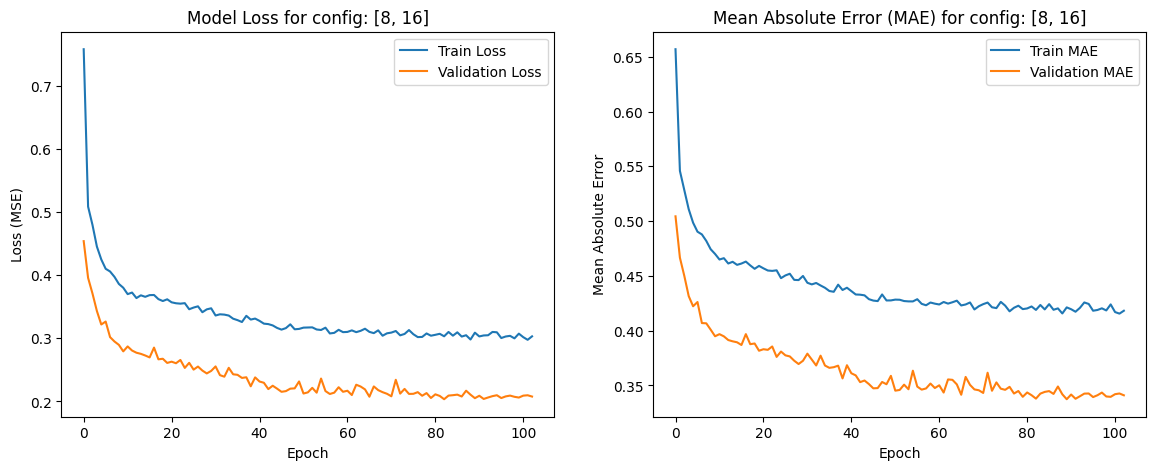

Training model with layers configuration: [20, 10]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.9145 - mean_absolute_error: 0.7100 - val_loss: 0.3599 - val_mean_absolute_error: 0.4508 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4541 - mean_absolute_error: 0.5163 - val_loss: 0.3251 - val_mean_absolute_error: 0.4284 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4192 - mean_absolute_error: 0.4988 - val_loss: 0.3007 - val_mean_absolute_error: 0.4085 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3971 - mean_absolute_error: 0.4827 - val_loss: 0.2880 - val_mean_absolute_error: 0.4018 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3992 - mean_absolute_error: 0.4832 - val_loss: 0.2855 - val_mean_absolute_error: 0.3993 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3737 - mean

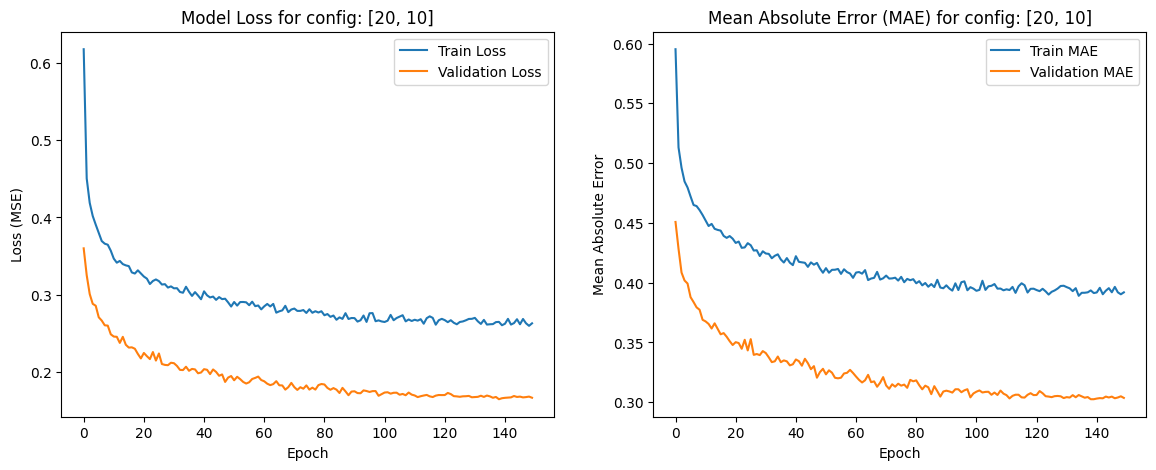

Training model with layers configuration: [10, 20]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0694 - mean_absolute_error: 0.7732 - val_loss: 0.4185 - val_mean_absolute_error: 0.4909 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5038 - mean_absolute_error: 0.5472 - val_loss: 0.3696 - val_mean_absolute_error: 0.4568 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4707 - mean_absolute_error: 0.5309 - val_loss: 0.3455 - val_mean_absolute_error: 0.4437 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4487 - mean_absolute_error: 0.5160 - val_loss: 0.3293 - val_mean_absolute_error: 0.4308 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4228 - mean_absolute_error: 0.5028 - val_loss: 0.3075 - val_mean_absolute_error: 0.4173 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4071 - mean

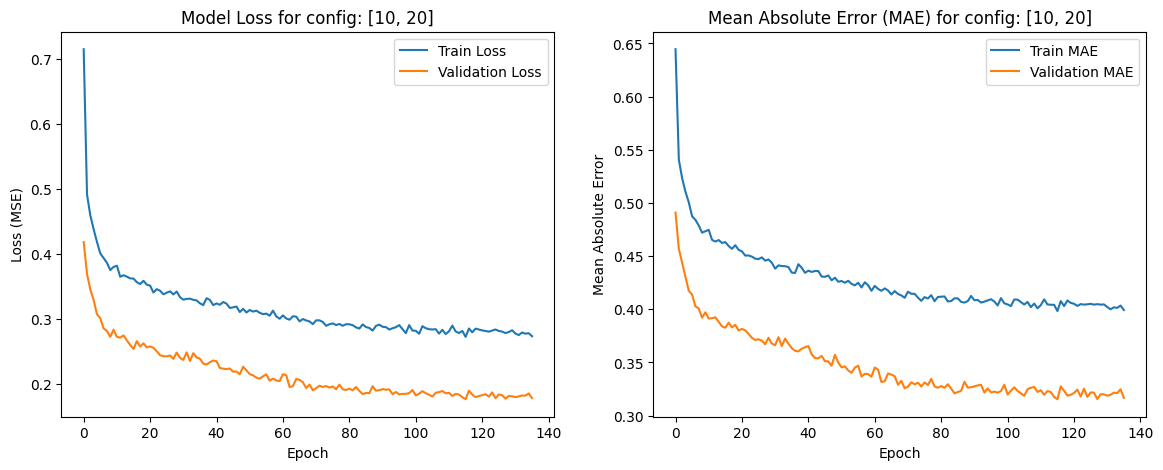

Training model with layers configuration: [32, 16]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9905 - mean_absolute_error: 0.7334 - val_loss: 0.3543 - val_mean_absolute_error: 0.4440 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4673 - mean_absolute_error: 0.5220 - val_loss: 0.3122 - val_mean_absolute_error: 0.4156 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4152 - mean_absolute_error: 0.4910 - val_loss: 0.2966 - val_mean_absolute_error: 0.4016 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3967 - mean_absolute_error: 0.4802 - val_loss: 0.2792 - val_mean_absolute_error: 0.3908 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3654 - mean_absolute_error: 0.4629 - val_loss: 0.2726 - val_mean_absolute_error: 0.3873 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3628 - mean

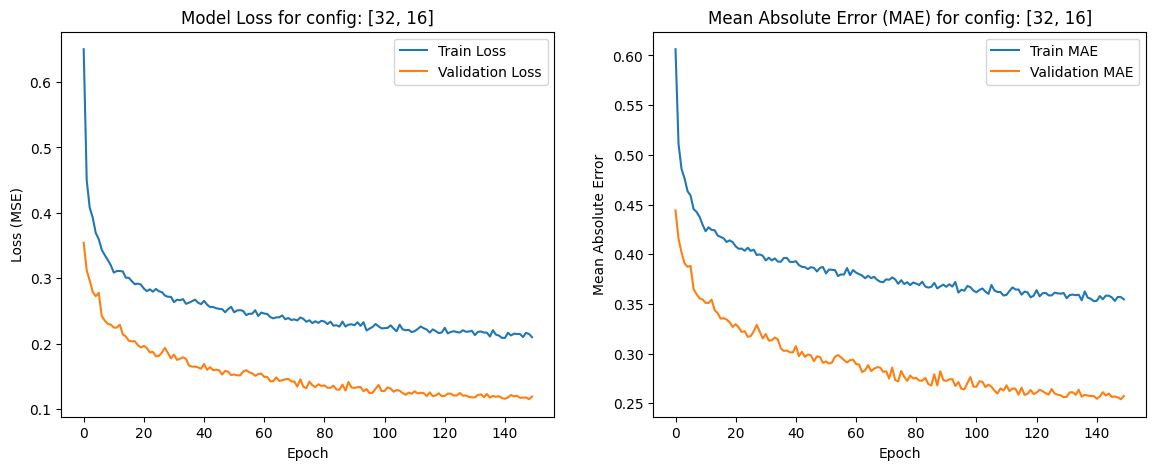

Training model with layers configuration: [16, 32]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7895 - mean_absolute_error: 0.6831 - val_loss: 0.3608 - val_mean_absolute_error: 0.4561 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4460 - mean_absolute_error: 0.5140 - val_loss: 0.3238 - val_mean_absolute_error: 0.4302 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4118 - mean_absolute_error: 0.4933 - val_loss: 0.3056 - val_mean_absolute_error: 0.4171 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3986 - mean_absolute_error: 0.4826 - val_loss: 0.3011 - val_mean_absolute_error: 0.4088 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3930 - mean_absolute_error: 0.4796 - val_loss: 0.2843 - val_mean_absolute_error: 0.3998 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3897 - mean

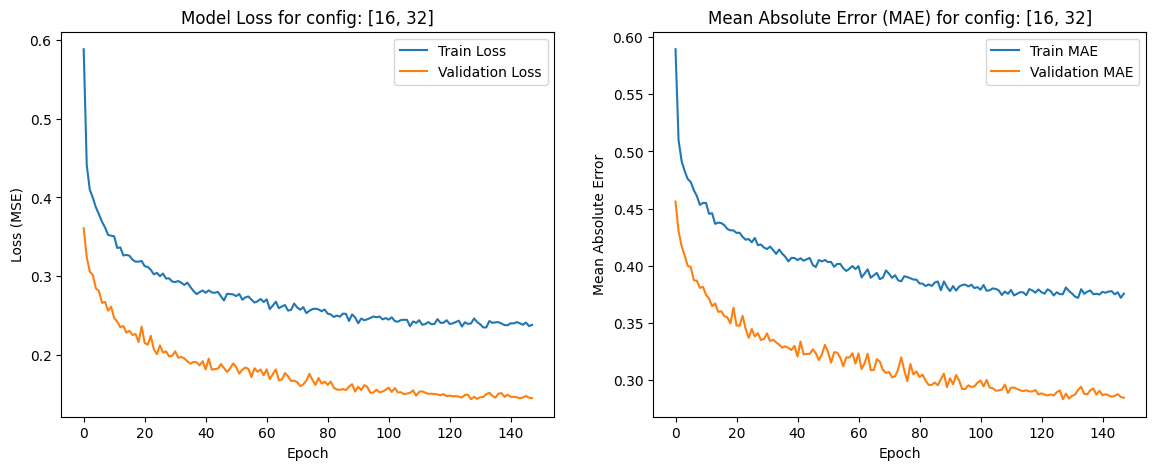

Training model with layers configuration: [48, 24]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9388 - mean_absolute_error: 0.7238 - val_loss: 0.3358 - val_mean_absolute_error: 0.4286 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4213 - mean_absolute_error: 0.4964 - val_loss: 0.2913 - val_mean_absolute_error: 0.4002 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3839 - mean_absolute_error: 0.4722 - val_loss: 0.2812 - val_mean_absolute_error: 0.3934 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3650 - mean_absolute_error: 0.4614 - val_loss: 0.2567 - val_mean_absolute_error: 0.3790 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3502 - mean_absolute_error: 0.4522 - val_loss: 0.2491 - val_mean_absolute_error: 0.3724 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3335 - mean

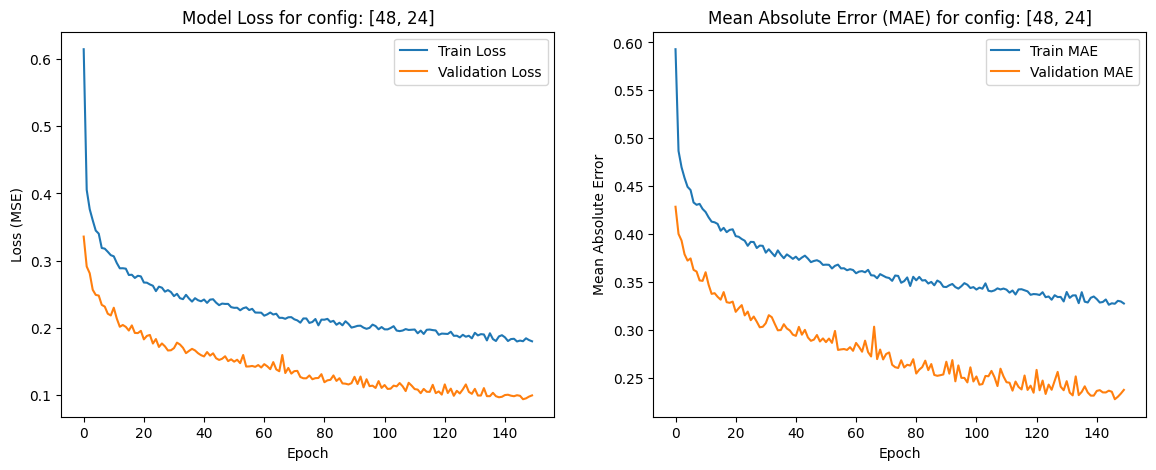

Training model with layers configuration: [24, 48]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9019 - mean_absolute_error: 0.7091 - val_loss: 0.3896 - val_mean_absolute_error: 0.4729 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4537 - mean_absolute_error: 0.5204 - val_loss: 0.3412 - val_mean_absolute_error: 0.4439 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4352 - mean_absolute_error: 0.5078 - val_loss: 0.3081 - val_mean_absolute_error: 0.4199 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4021 - mean_absolute_error: 0.4873 - val_loss: 0.2982 - val_mean_absolute_error: 0.4102 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3753 - mean_absolute_error: 0.4694 - val_loss: 0.2914 - val_mean_absolute_error: 0.4057 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3782 - mean

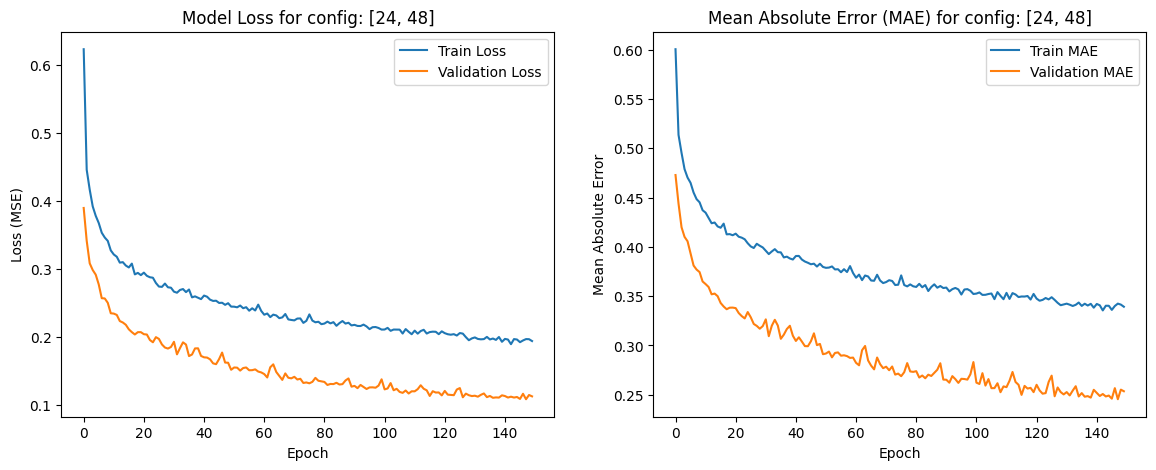

Training model with layers configuration: [16, 8, 16]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8583 - mean_absolute_error: 0.7165 - val_loss: 0.3999 - val_mean_absolute_error: 0.4745 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5326 - mean_absolute_error: 0.5643 - val_loss: 0.3887 - val_mean_absolute_error: 0.4708 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4901 - mean_absolute_error: 0.5388 - val_loss: 0.3611 - val_mean_absolute_error: 0.4492 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4640 - mean_absolute_error: 0.5207 - val_loss: 0.3413 - val_mean_absolute_error: 0.4369 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4496 - mean_absolute_error: 0.5127 - val_loss: 0.3234 - val_mean_absolute_error: 0.4255 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4288 - m

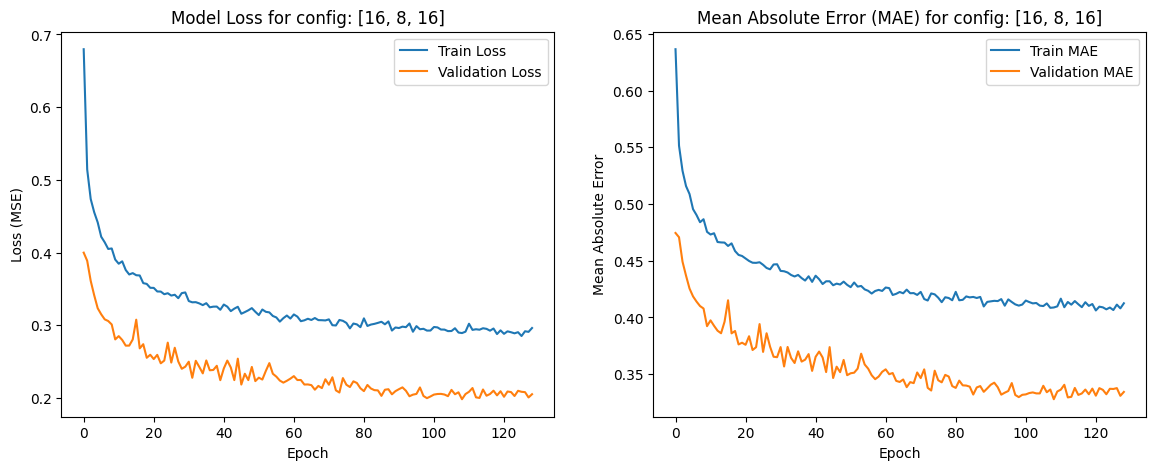

Training model with layers configuration: [8, 16, 8]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1813 - mean_absolute_error: 0.8284 - val_loss: 0.4901 - val_mean_absolute_error: 0.5232 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5793 - mean_absolute_error: 0.5882 - val_loss: 0.4081 - val_mean_absolute_error: 0.4719 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5274 - mean_absolute_error: 0.5537 - val_loss: 0.3630 - val_mean_absolute_error: 0.4484 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4908 - mean_absolute_error: 0.5409 - val_loss: 0.3359 - val_mean_absolute_error: 0.4303 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4784 - mean_absolute_error: 0.5314 - val_loss: 0.3262 - val_mean_absolute_error: 0.4250 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4490 - me

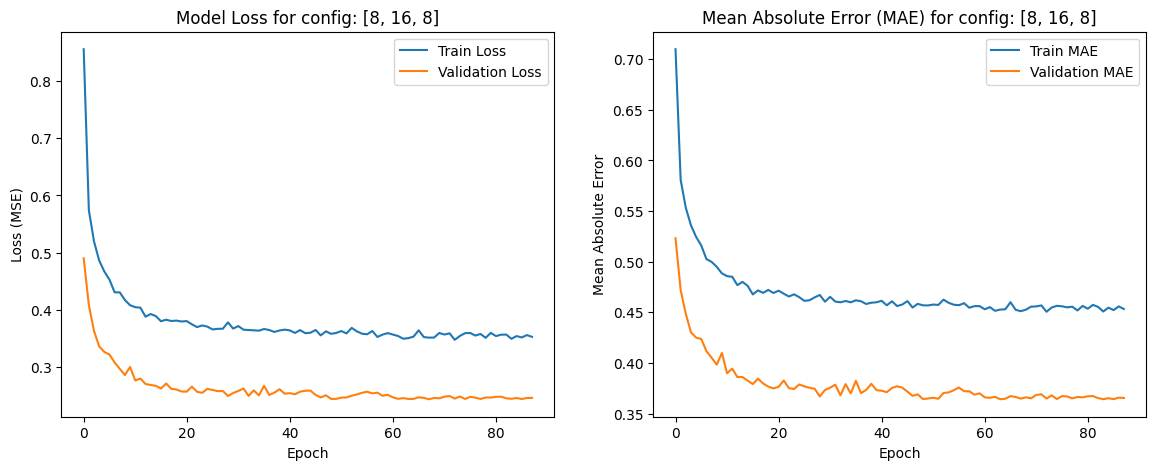

Training model with layers configuration: [20, 10, 20]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9000 - mean_absolute_error: 0.7177 - val_loss: 0.4168 - val_mean_absolute_error: 0.4823 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5047 - mean_absolute_error: 0.5446 - val_loss: 0.3662 - val_mean_absolute_error: 0.4504 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4645 - mean_absolute_error: 0.5193 - val_loss: 0.3214 - val_mean_absolute_error: 0.4196 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4295 - mean_absolute_error: 0.5020 - val_loss: 0.3014 - val_mean_absolute_error: 0.4080 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4148 - mean_absolute_error: 0.4921 - val_loss: 0.2936 - val_mean_absolute_error: 0.4027 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4026 - 

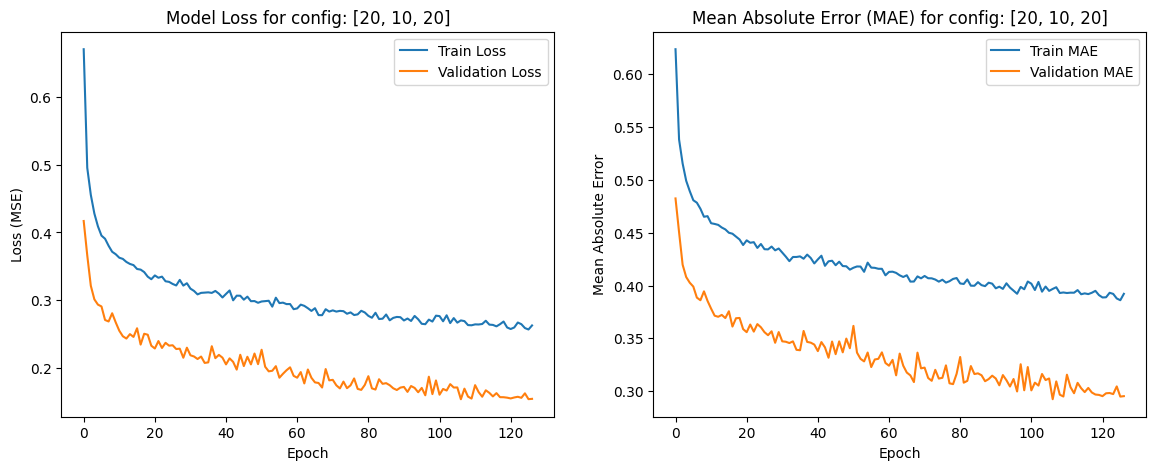

Training model with layers configuration: [10, 20, 10]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0336 - mean_absolute_error: 0.7977 - val_loss: 0.4538 - val_mean_absolute_error: 0.5174 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5539 - mean_absolute_error: 0.5789 - val_loss: 0.3919 - val_mean_absolute_error: 0.4725 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5066 - mean_absolute_error: 0.5495 - val_loss: 0.3582 - val_mean_absolute_error: 0.4493 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4578 - mean_absolute_error: 0.5200 - val_loss: 0.3358 - val_mean_absolute_error: 0.4331 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4387 - mean_absolute_error: 0.5082 - val_loss: 0.3195 - val_mean_absolute_error: 0.4195 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4351 - 

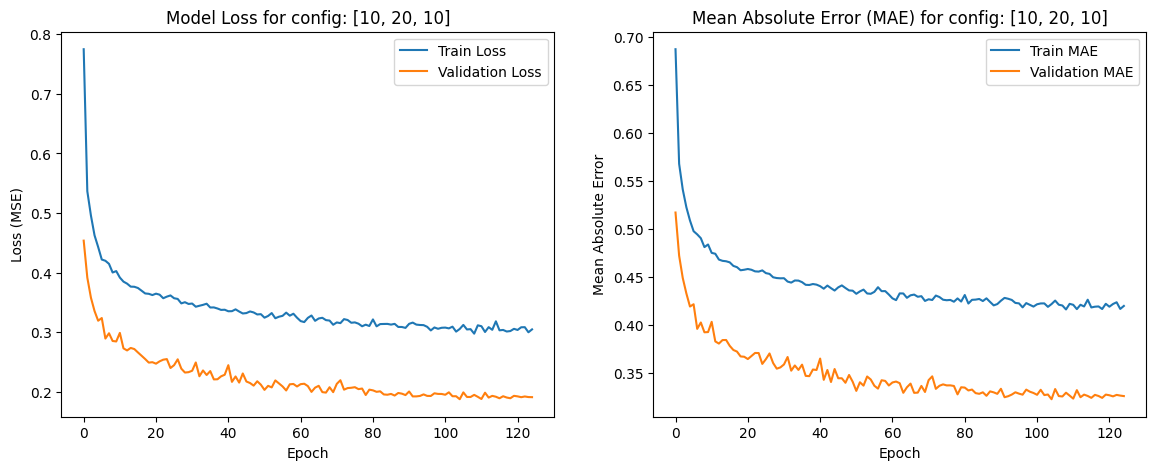

Training model with layers configuration: [32, 16, 32]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0012 - mean_absolute_error: 0.7424 - val_loss: 0.3468 - val_mean_absolute_error: 0.4456 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4560 - mean_absolute_error: 0.5223 - val_loss: 0.3210 - val_mean_absolute_error: 0.4253 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4311 - mean_absolute_error: 0.5048 - val_loss: 0.2763 - val_mean_absolute_error: 0.3927 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3921 - mean_absolute_error: 0.4814 - val_loss: 0.2765 - val_mean_absolute_error: 0.3926 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3671 - mean_absolute_error: 0.4657 - val_loss: 0.2489 - val_mean_absolute_error: 0.3766 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3655 - 

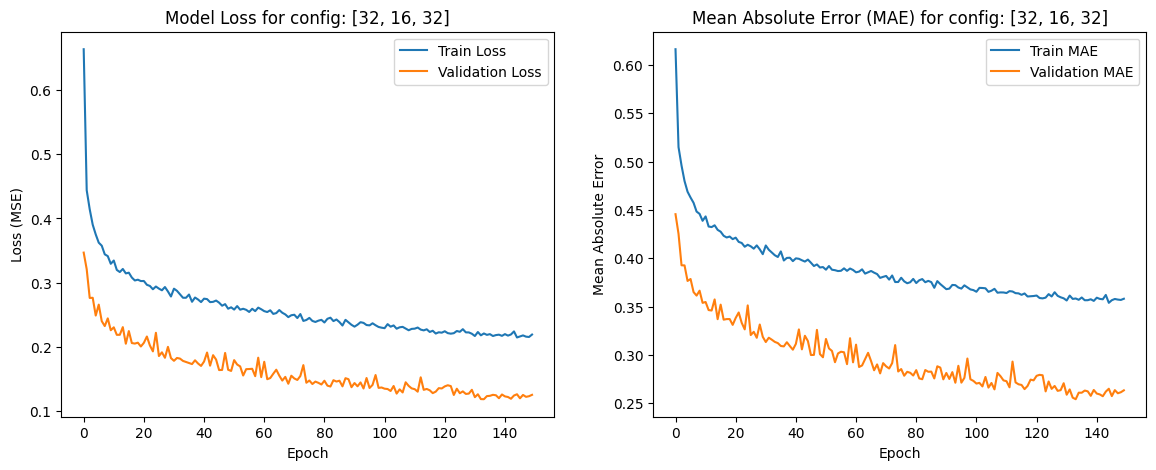

Training model with layers configuration: [16, 32, 16]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9793 - mean_absolute_error: 0.7527 - val_loss: 0.3998 - val_mean_absolute_error: 0.4839 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4984 - mean_absolute_error: 0.5466 - val_loss: 0.3406 - val_mean_absolute_error: 0.4425 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4533 - mean_absolute_error: 0.5201 - val_loss: 0.3083 - val_mean_absolute_error: 0.4176 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4244 - mean_absolute_error: 0.4988 - val_loss: 0.3042 - val_mean_absolute_error: 0.4154 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4099 - mean_absolute_error: 0.4914 - val_loss: 0.2892 - val_mean_absolute_error: 0.4050 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4015 - 

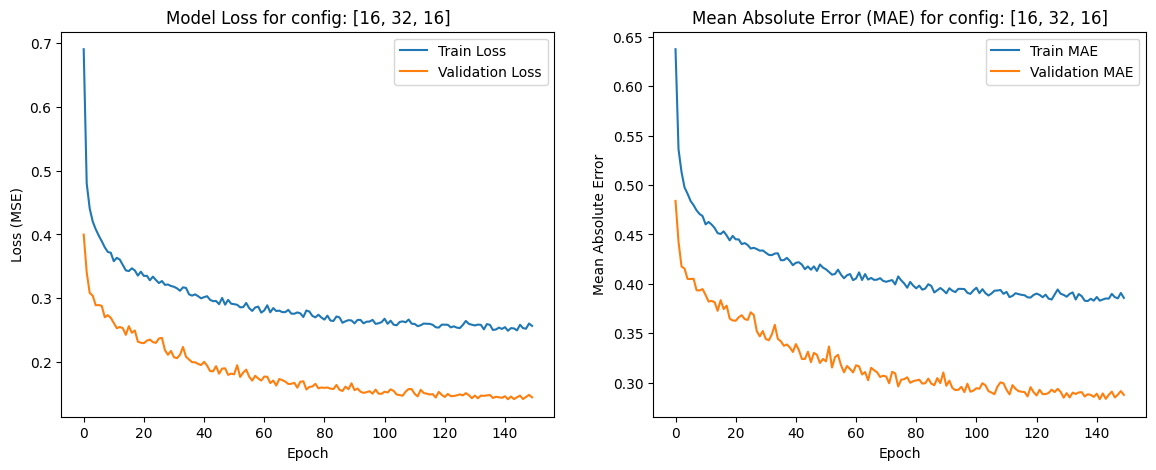

Training model with layers configuration: [48, 24, 48]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9093 - mean_absolute_error: 0.7183 - val_loss: 0.3161 - val_mean_absolute_error: 0.4264 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4407 - mean_absolute_error: 0.5081 - val_loss: 0.2705 - val_mean_absolute_error: 0.3945 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3878 - mean_absolute_error: 0.4783 - val_loss: 0.2501 - val_mean_absolute_error: 0.3786 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3752 - mean_absolute_error: 0.4703 - val_loss: 0.2341 - val_mean_absolute_error: 0.3704 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3524 - mean_absolute_error: 0.4576 - val_loss: 0.2251 - val_mean_absolute_error: 0.3598 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3349 - 

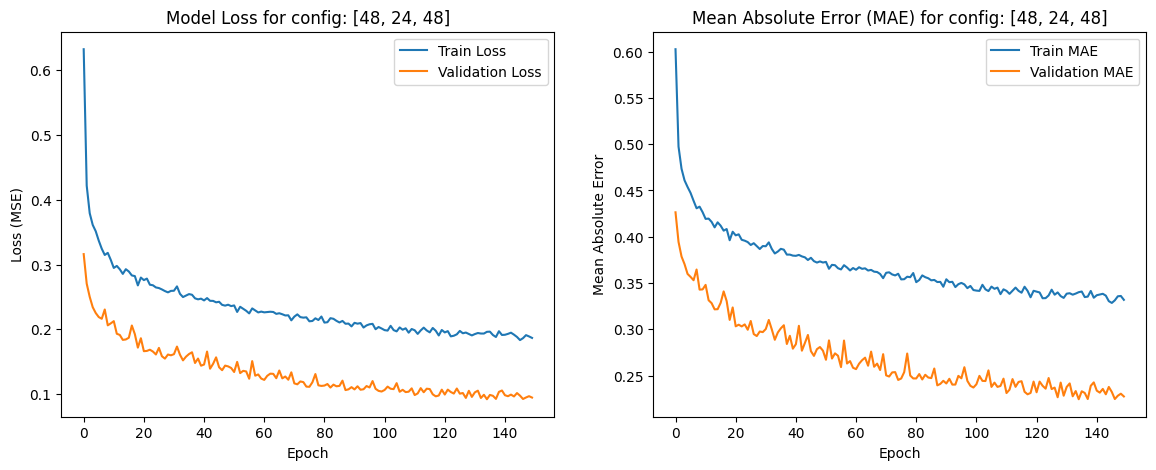

Training model with layers configuration: [24, 48, 24]
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9686 - mean_absolute_error: 0.7373 - val_loss: 0.3849 - val_mean_absolute_error: 0.4718 - learning_rate: 0.0100
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4638 - mean_absolute_error: 0.5253 - val_loss: 0.3356 - val_mean_absolute_error: 0.4340 - learning_rate: 0.0100
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4154 - mean_absolute_error: 0.4943 - val_loss: 0.3276 - val_mean_absolute_error: 0.4263 - learning_rate: 0.0100
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3966 - mean_absolute_error: 0.4808 - val_loss: 0.2901 - val_mean_absolute_error: 0.4034 - learning_rate: 0.0100
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3682 - mean_absolute_error: 0.4645 - val_loss: 0.2647 - val_mean_absolute_error: 0.3840 - learning_rate: 0.0100
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3596 - 

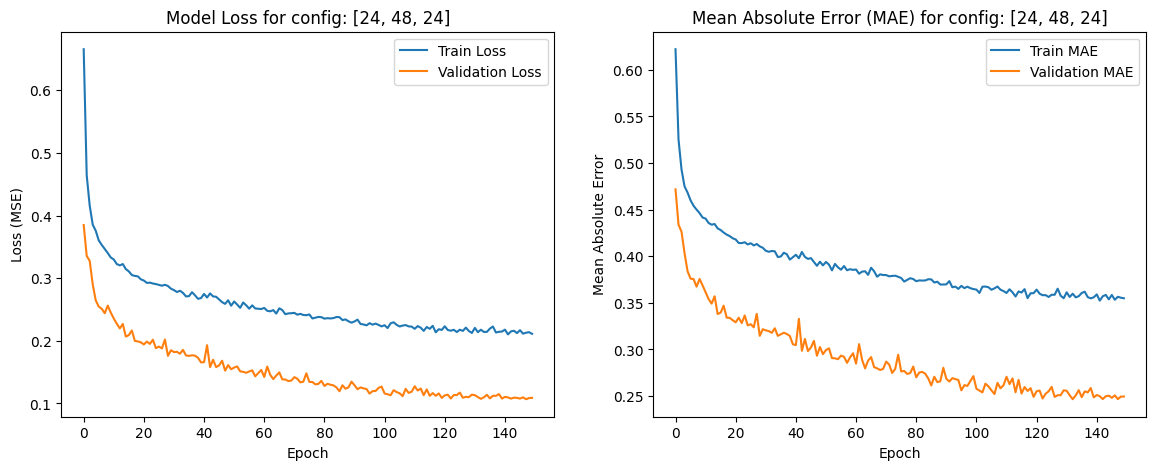

In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']

# Add the one-hot encoded columns for 'District' and 'Condition'
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Function to build a model with a specified number of layers and neurons per layer
def build_model(layers_config, input_dim):
    model = Sequential()
    for i, neurons in enumerate(layers_config):
        if i == 0:
            model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
        else:
            model.add(Dense(neurons, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    model.add(Dense(1))  
    return model

# Experiment with different configurations of layers and neurons
configs = [           
    [16, 8],
    [8, 16],
    [20, 10],
    [10, 20],
    [32, 16],
    [16, 32],  
    [48, 24],
    [24, 48], 

    [16, 8,16],
    [8, 16, 8],
    [20, 10, 20],
    [10, 20, 10],
    [32, 16, 32],
    [16, 32, 16],  
    [48, 24, 48],
    [24, 48, 24],           
]

# Function to compile and train a model and return its history
def train_model(layers_config):
    model = build_model(layers_config, X_train.shape[1])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1,
                        callbacks=[early_stopping, reduce_lr])
    return history

# Plot results for each configuration
def plot_results(history, config):
    plt.figure(figsize=(14, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for config: {config}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend(loc='upper right')

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Train MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title(f'Mean Absolute Error (MAE) for config: {config}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.show()

# Loop over configurations and train models
for config in configs:
    print(f"Training model with layers configuration: {config}")
    history = train_model(config)
    plot_results(history, config)

In [23]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the data
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
# Apply log transformation
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])

# Encode categorical variables
label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Select features
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 'TSP0', 'MOP1', 'MOP2', 'MOP3',
            'temperature_2m_max', 'temperature_2m_min', 'sunshine_duration', 'rain_sum',
            'wind_speed_10m_max', 'et0_fao_evapotranspiration_sum', 'Season']

features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')])
X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Function to build the model with custom neuron configuration
def build_model(layers_config, input_dim):
    model = Sequential()
    model.add(Dense(layers_config[0], input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    for neurons in layers_config[1:]:
        model.add(Dense(neurons, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    return model

# Example configurations with increasing and decreasing neurons
layer_configs = [
    [16, 32, 64, 32, 16],  # Increasing to 64 then decreasing
    [32, 64, 128, 64, 32], # Increasing to 128 then decreasing
    [64, 128, 256, 128, 64], # Increasing to 256 then decreasing
]

# Train models with different configurations
results = []
for config in layer_configs:
    model = build_model(config, X_train.shape[1])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0,
                        callbacks=[early_stopping, reduce_lr])

    # Record the minimum validation MAE
    min_val_mae = min(history.history['val_mean_absolute_error'])
    results.append({
        'config': config,
        'val_mae': min_val_mae
    })

# Output results or further analysis
print(results)


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[{'config': [16, 32, 64, 32, 16], 'val_mae': 0.3255920112133026}, {'config': [32, 64, 128, 64, 32], 'val_mae': 0.2475980967283249}, {'config': [64, 128, 256, 128, 64], 'val_mae': 0.19603058695793152}]
